In [1]:
a = []

In [2]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("cannot open camera")
    exit()

while True:
    # capture frame by frame
    ret, frame = cap.read()
    # a = cap.get(5) to get the video FPS
    
    # print(type(frame)) # class is numpy.ndarray
    # print(frame.shape) # shape is (480,640,3)

    a.append(frame)
    
    #if frame is read correctly ret is True
    if not ret:
        print("can't retrieve frame, stream stopped!!..Exiting!!")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2BGRA)
    
    cv.imshow('frame',gray)
    cv.rectangle(frame,(50,50),(50,50),(255,0,0),2)

    if cv.waitKey(1) == ord('q'):
        break
       
cap.release()
cv.destroyAllWindows()


In [3]:
len(a)

60

In [4]:
a[-1]

array([[[219, 219, 219],
        [228, 228, 228],
        [228, 228, 228],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[226, 226, 226],
        [230, 230, 230],
        [232, 232, 232],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[230, 230, 230],
        [232, 232, 232],
        [233, 233, 233],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       ...,

       [[ 38,  38,  51],
        [ 37,  37,  50],
        [ 36,  35,  49],
        ...,
        [116, 117, 115],
        [115, 115, 115],
        [116, 116, 116]],

       [[ 37,  37,  50],
        [ 37,  37,  50],
        [ 36,  35,  49],
        ...,
        [119, 119, 119],
        [116, 116, 118],
        [118, 117, 119]],

       [[ 37,  37,  50],
        [ 37,  37,  50],
        [ 37,  37,  50],
        ...,
        [120, 120, 120],
        [112, 110, 115],
        [116, 115, 120]]

In [5]:
import matplotlib.pyplot as plt

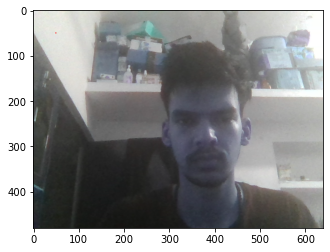

In [6]:
plt.imshow(a[-1])

In [15]:
from PIL import Image
import tensorflow as tf

In [19]:
img = Image.fromarray(a[-1],'RGB')
target_size=(160, 160)
img.resize(target_size)
img = np.around(np.array(img) / 255.0, decimals=12)

array([[[0.85882353, 0.85882353, 0.85882353],
        [0.89411765, 0.89411765, 0.89411765],
        [0.89411765, 0.89411765, 0.89411765],
        ...,
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686]],

       [[0.88627451, 0.88627451, 0.88627451],
        [0.90196078, 0.90196078, 0.90196078],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686]],

       [[0.90196078, 0.90196078, 0.90196078],
        [0.90980392, 0.90980392, 0.90980392],
        [0.91372549, 0.91372549, 0.91372549],
        ...,
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.99215686]],

       ...,

       [[0.14901961, 0.14901961, 0.2       ],
        [0.14509804, 0.14509804, 0.19607843],
        [0.14117647, 0

In [10]:
pwd

'/home/charchit/Desktop/DLS/face_recog'

In [38]:
def img_to_encoding_for_who(image_name, model):
    target_size = (160,160)
    img = Image.fromarray(image_name, 'RGB')
    aaa = img.resize(target_size)
    img = np.around(np.array(aaa) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)

    return embedding / np.linalg.norm(embedding, ord=2)

In [39]:
from tensorflow import keras
model = keras.models.load_model('/home/charchit/Desktop/DLS/face_recog/files/model_data/')

img_to_encoding_for_who(a[-1],model)

array([[-0.04919439, -0.05697436, -0.10354967, -0.06726579,  0.06008795,
         0.02843487, -0.00794026,  0.00309728,  0.06022062,  0.05345825,
         0.06540462, -0.07151574, -0.02356303, -0.17300543, -0.03360307,
         0.05112258,  0.04424765, -0.04309739,  0.08022366, -0.16671164,
         0.0059023 ,  0.01892908, -0.03327358,  0.01530093,  0.0003093 ,
        -0.08187346,  0.15748452,  0.03480618, -0.16602136, -0.04528175,
        -0.1481813 ,  0.04082797,  0.00734313, -0.01154119,  0.17381555,
        -0.01992147,  0.10008501, -0.04242655,  0.16680014, -0.04326514,
         0.03456134,  0.04515973, -0.04576197, -0.04804906, -0.06202606,
        -0.12890796,  0.01502119, -0.01842075,  0.09068861,  0.07143126,
        -0.13371731,  0.07257969,  0.09006069, -0.03718024,  0.01317498,
         0.1052796 ,  0.07660256, -0.01987805, -0.05127175, -0.22012253,
        -0.05961782, -0.03416539, -0.02198474,  0.14041352,  0.08359423,
         0.15547289,  0.0501202 ,  0.05998836, -0.0

In [37]:
image_name = a[-1]
target_size = (160,160)
img = Image.fromarray(image_name, 'RGB')
aaa = img.resize(target_size)
img = np.around(np.array(aaa) / 255.0, decimals=12)
print(img.shape)
x_train = np.expand_dims(img, axis=0)
x_train.shape

(160, 160, 3)


(1, 160, 160, 3)